In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import cv2

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:

os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] ='false'
os.environ['XLA_PYTHON_CLIENT_ALLOCATOR']='platform'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ./FER2013plusplus

In [ ]:
import zipfile

def extract_zip(zip_file, target_dir):
    with zipfile.ZipFile(zip_file, "r") as zip_ref:
        zip_ref.extractall(target_dir)

if __name__ == "__main__":

    zip_file = "/content/drive/MyDrive/Colab/DataSet/fer2013Plus+.zip"
    target_dir = "./FER2013plusplus/"
    extract_zip(zip_file, target_dir)


In [ ]:
col_names = ["usage","img_name", "neutral","happiness","surprise","sadness","anger","disgust","fear","contempt","Unknown", "NF"]
di = {'neutral': 0, 'happiness': 1,'surprise': 2,'sadness': 3,'anger': 4,'disgust': 5,'fear': 6,'contempt': 7,'Unknown': 8,'NF': 9}
df = pd.read_csv('/content/FER2013plusplus/file/FERPlus_newformat/fer2013new.csv',names=col_names,header=None,skiprows = 1)
print(df.shape)

(122014, 12)


In [ ]:
def process_df(folder_df):
  use_cols = [x for x in folder_df.columns][2:]
  folder_df['emotion'] = folder_df[use_cols].idxmax(axis=1)
  folder_df = folder_df[['img_name','emotion']]
  folder_df['emotion'] = folder_df['emotion'].map(di)
  folder_df['emotion'] = folder_df['emotion'].apply(str)
  return folder_df

new_col_names = ["img_name","size", "neutral","happiness","surprise","sadness","anger","disgust","fear","contempt","Unknown", "NF"]
train_df =  pd.read_csv('/content/FER2013plusplus/file/FERPlus/data/FER2013Train/label.csv',names=new_col_names,header=None)
test_df =  pd.read_csv('/content/FER2013plusplus/file/FERPlus/data/FER2013Test/label.csv',names=new_col_names,header=None)
valid_df =  pd.read_csv('/content/FER2013plusplus/file/FERPlus/data/FER2013Valid/label.csv',names=new_col_names,header=None)


combined_df = pd.concat([valid_df, test_df], ignore_index=True)
# Add combined_df to train_df
train_df = pd.concat([train_df, combined_df], ignore_index=True)
# Print the updated train_df


train_df.drop("NF", axis=1, inplace=True)
test_df.drop("NF", axis=1, inplace=True)
valid_df.drop("NF", axis=1, inplace=True)
print(train_df)
train_df_2=train_df.copy()
train_df = process_df(train_df)
test_df = process_df(test_df)
valid_df = process_df(valid_df)



                img_name            size  neutral  happiness  surprise  \
0       fer0000000_0.png  (0, 0, 48, 48)        4          0         0   
1       fer0000000_1.png  (0, 0, 48, 48)        4          0         0   
2       fer0000000_2.png  (0, 0, 48, 48)        4          0         0   
3       fer0000000_3.png  (0, 0, 48, 48)        4          0         0   
4       fer0000001_0.png  (0, 0, 48, 48)        6          0         1   
...                  ...             ...      ...        ...       ...   
121379    fer0035796.png  (0, 0, 48, 48)        5          0         0   
121380    fer0035797.png  (0, 0, 48, 48)        8          0         0   
121381    fer0035799.png  (0, 0, 48, 48)        0          0         0   
121382    fer0035800.png  (0, 0, 48, 48)        0         10         0   
121383    fer0035801.png  (0, 0, 48, 48)        5          0         0   

        sadness  anger  disgust  fear  contempt  Unknown  
0             1      3        2     0         0     

<ipython-input-8-2361363c97b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  folder_df['emotion'] = folder_df['emotion'].map(di)
<ipython-input-8-2361363c97b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  folder_df['emotion'] = folder_df['emotion'].apply(str)
<ipython-input-8-2361363c97b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

(48, 48, 3)


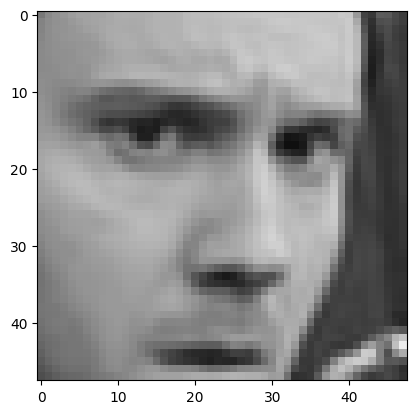

In [ ]:
# Preview image
img = cv2.imread('/content/FER2013plusplus/file/FERPlus/data/FER2013Train/fer0000000_2.png')
plt.imshow(img)
print(img.shape)

In [ ]:
train_df.count()

type(train_df)

pandas.core.frame.DataFrame

In [ ]:
train_df

,img_name,emotion
0,fer0000000_0.png,0
1,fer0000000_1.png,0
2,fer0000000_2.png,0
3,fer0000000_3.png,0
4,fer0000001_0.png,0
...,...,...
121379,fer0035796.png,0
121380,fer0035797.png,0
121381,fer0035799.png,4
121382,fer0035800.png,1


In [ ]:
import os

invalid_filenames = []

# Lặp qua từng hàng trong DataFrame
for index, row in train_df.iterrows():
    img_name = row['img_name']
    if not os.path.isfile(os.path.join('/content/FER2013plusplus/file/FERPlus/data/FER2013Train', img_name)):
        invalid_filenames.append(img_name)

# In ra các tên file không hợp lệ
print("Các tên file không hợp lệ:")
for filename in invalid_filenames:
    print(filename)

Streaming output truncated to the last 5000 lines.
fer0030790.png
fer0030791.png
fer0030792.png
fer0030793.png
fer0030794.png
fer0030795.png
fer0030796.png
fer0030797.png
fer0030798.png
fer0030799.png
fer0030800.png
fer0030801.png
fer0030802.png
fer0030803.png
fer0030804.png
fer0030805.png
fer0030806.png
fer0030807.png
fer0030808.png
fer0030809.png
fer0030810.png
fer0030811.png
fer0030812.png
fer0030813.png
fer0030814.png
fer0030815.png
fer0030816.png
fer0030817.png
fer0030818.png
fer0030819.png
fer0030820.png
fer0030821.png
fer0030822.png
fer0030823.png
fer0030824.png
fer0030825.png
fer0030826.png
fer0030827.png
fer0030828.png
fer0030829.png
fer0030830.png
fer0030831.png
fer0030832.png
fer0030833.png
fer0030834.png
fer0030835.png
fer0030836.png
fer0030837.png
fer0030838.png
fer0030839.png
fer0030840.png
fer0030841.png
fer0030842.png
fer0030843.png
fer0030844.png
fer0030845.png
fer0030846.png
fer0030847.png
fer0030848.png
fer0030849.png
fer0030850.png
fer0030851.png
fer0030852.png
fer0

In [ ]:
train_df

,img_name,emotion
0,fer0000000_0.png,0
1,fer0000000_1.png,0
2,fer0000000_2.png,0
3,fer0000000_3.png,0
4,fer0000001_0.png,0
...,...,...
121379,fer0035796.png,0
121380,fer0035797.png,0
121381,fer0035799.png,4
121382,fer0035800.png,1


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Splitting the DataFrame into train and validation sets
datagen = ImageDataGenerator(
    rescale=1/255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Chia 20% dữ liệu thành tập validation
)
datadir = "/content/FER2013plusplus/file/FERPlus/data/FER2013Train"
from sklearn.model_selection import train_test_split

# Splitting the DataFrame into train, validation, and test sets

train_data, test_data = train_test_split(train_df, test_size=0.03, random_state=42)


# Creating data generators for training, validation, and testing
train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=datadir,
    x_col="img_name",
    y_col="emotion",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(48, 48),
    subset="training"
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=datadir,
    x_col="img_name",
    y_col="emotion",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(48, 48),
    subset="validation"
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_data,
    directory=datadir,
    x_col="img_name",
    y_col="emotion",
    batch_size=32,
    seed=42,
    shuffle=False,  # No shuffling for the test set
    class_mode="categorical",
    target_size=(48, 48)
)

print("test: ", test_generator.n)
print("train: ", train_generator.n)
print("val: ", valid_generator.n)

Found 88642 validated image filenames belonging to 9 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 6940 invalid image filename(s) in x_col="img_name". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 6940 invalid image filename(s) in x_col="img_name". These filename(s) will be ignored.
  warnings.warn(


Found 22160 validated image filenames belonging to 9 classes.
Found 3430 validated image filenames belonging to 9 classes.
test:  3430
train:  88642
val:  22160


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 212 invalid image filename(s) in x_col="img_name". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
df_copy = test_data.copy()
df_copy

,img_name,emotion
33767,fer0008473_3.png,1
31938,fer0008016_2.png,1
90558,fer0022711_2.png,3
92334,fer0023157_2.png,0
10835,fer0002717_3.png,0
...,...,...
57128,fer0014329_0.png,1
76273,fer0019131_1.png,5
61903,fer0015525_3.png,1
24210,fer0006075_2.png,3


In [ ]:
# Tạo một bảng mới để lưu các hàng có giá trị img_name trùng nhau
matching_rows = pd.DataFrame()

# Lặp qua từng giá trị img_name trong train_df
for img_name in train_df_2['img_name']:
    # Kiểm tra nếu giá trị img_name cũng tồn tại trong test_data
    if img_name in test_data['img_name'].values:
        # Lấy hàng có giá trị img_name trùng trong train_df
        matching_row = train_df_2[train_df_2['img_name'] == img_name]
        # Thêm hàng vào bảng matching_rows
        matching_rows = matching_rows.append(matching_row, ignore_index=True)

# Hiển thị bảng matching_rows
print(matching_rows)

<ipython-input-16-150d0addfe0d>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_rows = matching_rows.append(matching_row, ignore_index=True)


              img_name            size  neutral  happiness  surprise  sadness  \
0     fer0000000_0.png  (0, 0, 48, 48)        4          0         0        1   
1     fer0000011_0.png  (0, 0, 48, 48)       10          0         0        0   
2     fer0000015_2.png  (0, 0, 48, 48)        0          0         6        0   
3     fer0000022_3.png  (0, 0, 48, 48)        1          0         1        1   
4     fer0000030_3.png  (0, 0, 48, 48)        0          9         0        0   
...                ...             ...      ...        ...       ...      ...   
3637    fer0035665.png  (0, 0, 48, 48)        1          0         5        0   
3638    fer0035667.png  (0, 0, 48, 48)        0          1         6        0   
3639    fer0035697.png  (0, 0, 48, 48)        8          0         0        2   
3640    fer0035758.png  (0, 0, 48, 48)        0         10         0        0   
3641    fer0035777.png  (0, 0, 48, 48)        2          0         3        0   

      anger  disgust  fear 

In [ ]:
df_copy = matching_rows.copy()

useful_cols = [x for x in df_copy.columns][2:]
dfc = df_copy[useful_cols]
dfc['emotion'] = dfc.idxmax(axis=1)
df_final = pd.concat([df_copy[['img_name']],  dfc[['emotion']]], axis=1, ignore_index=False)

df_final['img_name'] = df_final['img_name'].apply(str)
df_final = df_final.replace('nan', np.nan)
df_final.dropna(subset = ["img_name"], inplace=True)
df_final = df_final.reset_index(drop=True)

df_final['emotion'] = df_final['emotion'].map(di)
df_final['emotion'] = df_final['emotion'].apply(str)


test_datagen = ImageDataGenerator(rescale=1/255)
df_final_test_generator=test_datagen.flow_from_dataframe(
    dataframe=df_final,
    directory=datadir,
    x_col="img_name",
    y_col="emotion",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(48,48))



Found 3430 validated image filenames belonging to 9 classes.


<ipython-input-17-eaebfbfeb0cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['emotion'] = dfc.idxmax(axis=1)
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 212 invalid image filename(s) in x_col="img_name". These filename(s) will be ignored.
  warnings.warn(


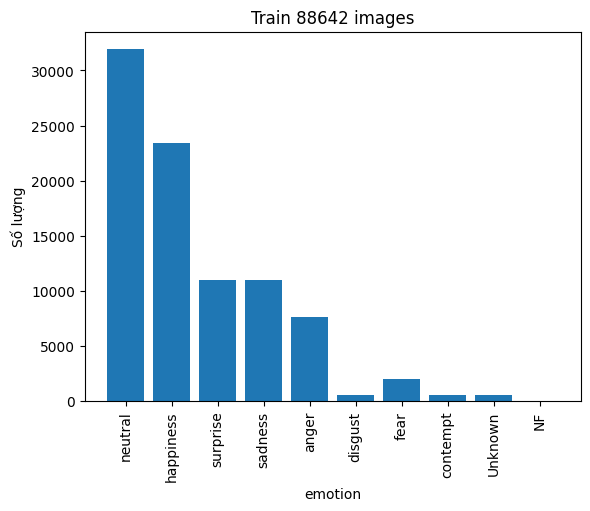

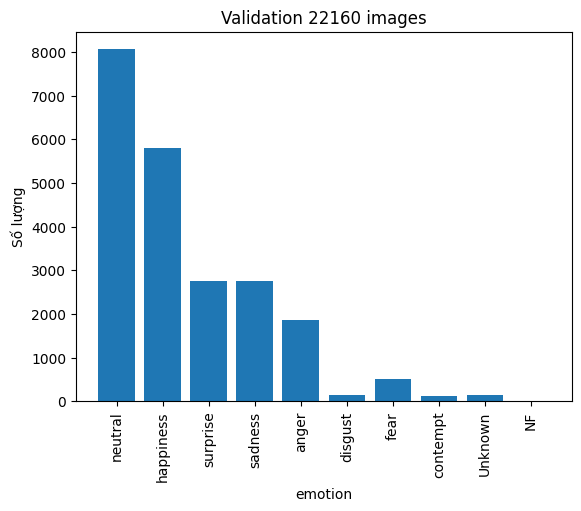

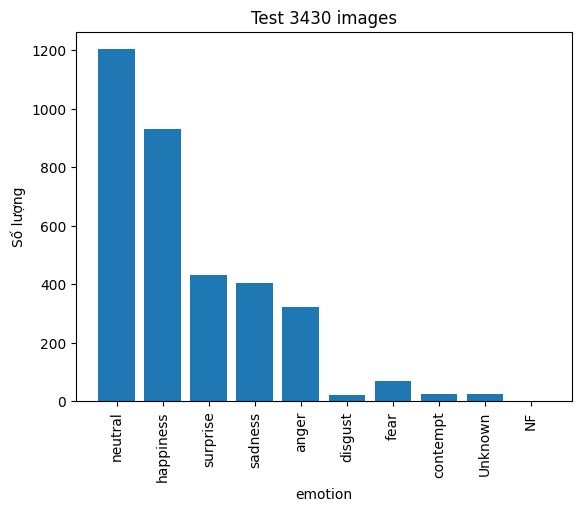

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert train_emotion_counts to a numpy array
train_emotion_counts = np.array(train_generator.classes)

# Trực quan hóa số lượng mỗi giá trị trong cột 'emotion' của DataFrame train_data
train_emotion_labels = [k for k, v in di.items()]
train_emotion_values = [np.sum(train_emotion_counts == v) for v in range(len(train_emotion_labels))]

plt.bar(range(len(train_emotion_labels)), train_emotion_values)
plt.xlabel('emotion')
plt.ylabel('Số lượng')
plt.title(f'Train {train_generator.n} images')
plt.xticks(range(len(train_emotion_labels)), train_emotion_labels)
plt.xticks(rotation='vertical')  # Xoay xticks theo chiều dọc
plt.show()

# Trực quan hóa số lượng mỗi giá trị trong cột 'emotion' của DataFrame validation_data
val_emotion_counts = np.array(valid_generator.classes)
val_emotion_values = [np.sum(val_emotion_counts == v) for v in range(len(train_emotion_labels))]

plt.bar(range(len(train_emotion_labels)), val_emotion_values)
plt.xlabel('emotion')
plt.ylabel('Số lượng')
plt.title(f'Validation {valid_generator.n} images')
plt.xticks(range(len(train_emotion_labels)), train_emotion_labels)
plt.xticks(rotation='vertical')  # Xoay xticks theo chiều dọc
plt.show()

# Trực quan hóa số lượng mỗi giá trị trong cột 'emotion' của DataFrame test_data
test_emotion_counts = np.array(test_generator.classes)
test_emotion_values = [np.sum(test_emotion_counts == v) for v in range(len(train_emotion_labels))]

plt.bar(range(len(train_emotion_labels)), test_emotion_values)
plt.xlabel('emotion')
plt.ylabel('Số lượng')
plt.title(f'Test {test_generator.n} images')
plt.xticks(range(len(train_emotion_labels)), train_emotion_labels)
plt.xticks(rotation='vertical')  # Xoay xticks theo chiều dọc
plt.show()


## Transfer learning

In [ ]:
!pip install featurelayers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Concatenate, Conv2D, UpSampling2D
from tensorflow.keras.layers import Input, BatchNormalization, Dense

# Load the Xception model
base_model = Xception(input_shape=(71, 71, 3), include_top=False, weights='imagenet')

# Resize the input images to the minimum required size
input_size = (71, 71)
input_shape = (48, 48, 3)  # Adjust this according to your actual input shape
inputs = Input(shape=input_shape)
resized_inputs = tf.image.resize(inputs, input_size)

# Apply the Xception model to the input
x = base_model(resized_inputs)

# Update the input shape for the LBC-like layers
lbc_input_shape = (35, 35, 32)

# Use 1x1 Convolution to adjust the number of channels of the Xception output
x_adjusted = Conv2D(lbc_input_shape[-1], kernel_size=(1, 1), activation='relu')(x)

# Upsample x_adjusted to match the spatial dimensions of x
x_adjusted = UpSampling2D(size=(4, 4))(x_adjusted)

# Create a new model that combines Conv2D and LBC-like layers
for layer in base_model.layers[1:]:
    if isinstance(layer, BatchNormalization):
        # Create a parallel batch normalization layer with the same number of filters as the LBC-like output channels
        parallel_bn = BatchNormalization(name=layer.name + '_parallel', axis=-1)  # Set axis to -1
        # Concatenate the adjusted Xception output with the original batch normalization output
        x = Concatenate()([x_adjusted, x])
        # Apply batch normalization
        x = parallel_bn(x)
    elif isinstance(layer, Conv2D):
        # Create a parallel convolution layer with LBC-like convolution
        parallel_conv = Conv2D(filters=32,  # Set filters to 32 to match the LBC-like output channels
                               kernel_size=layer.kernel_size,
                               padding=layer.padding,
                               activation=layer.activation,
                               name=layer.name + '_parallel',
                               use_bias=layer.use_bias,
                               kernel_initializer=layer.kernel_initializer,
                               bias_initializer=layer.bias_initializer)
        # Concatenate the adjusted Xception output with the original convolution output
        x = Concatenate()([x_adjusted, x])
        # Apply the parallel convolution
        x = parallel_conv(x)
    else:
        # For non-convolutional layers, just pass the output through
        x = layer(x)

# Add a global average pooling layer
x = GlobalAveragePooling2D()(x)

# Create your desired output layers on top of the concatenated output
# For example:
outputs = Dense(9, activation='softmax')(x)

# Create the final model
combined_model = Model(inputs, outputs)

# Compile the model (add loss, optimizer, and metrics as needed)
learning_rate = 0.005
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
combined_model.compile(optimizer=optimizer,
                       loss=tf.keras.losses.CategoricalCrossentropy(),
                       metrics=['accuracy'])

# Now, the `combined_model` is ready to be trained and used for your specific task.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from featurelayers.layers.LBC import LBC

# Load the Xception model
base_model = tf.keras.applications.Xception(input_shape=(71, 71, 3), include_top=False, weights='imagenet')

# Resize the input images to the minimum required size
input_size = (71, 71)
input_shape = (48, 48, 3)  # Adjust this according to your actual input shape
inputs = tf.keras.Input(shape=input_shape)
resized_inputs = tf.image.resize(inputs, input_size)

# Apply the LBC layer
lbc_layer = LBC(filters=3, kernel_size=(3, 3), strides=1, padding='same', activation='relu', sparsity=0.9, name='lbc_layer')
lbc_output = lbc_layer(resized_inputs)

# Apply the Xception model to the output of the LBC layer
x = base_model(lbc_output)

# Add a global average pooling layer
x = GlobalAveragePooling2D()(x)

# Create your desired output layers on top of the Xception base
# For example:
outputs = tf.keras.layers.Dense(9, activation='softmax')(x)

# Create the final model
combined_model = Model(inputs, outputs)

# Compile the model (add loss, optimizer, and metrics as needed)
# combined_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Now, the `combined_model` is ready to be trained and used for your specific task.

learning_rate = 0.005
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
combined_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])



In [ ]:
STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n // valid_generator.batch_size

In [ ]:
combined_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 tf.image.resize_9 (TFOpLamb  (None, 71, 71, 3)        0         
 da)                                                             
                                                                 
 lbc_12 (LBC)                (None, 71, 71, 3)         81        
                                                                 
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 global_average_pooling2d_7   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 9)                 1844

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Định nghĩa callback để lưu mô hình có recall tốt nhất
checkpoint = ModelCheckpoint('Xception.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

# Huấn luyện mô hình với callback
history = combined_model.fit(
    x=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    validation_data=valid_generator,
    validation_steps=STEP_SIZE_VALID,
    epochs=50,
    callbacks=[checkpoint]
)


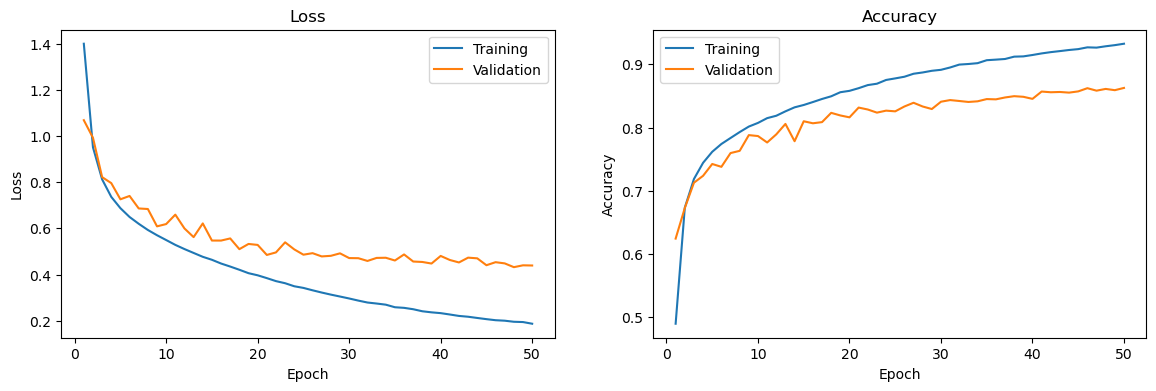

In [ ]:
#validation and training loss vs epoch graph
history = history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['accuracy'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()

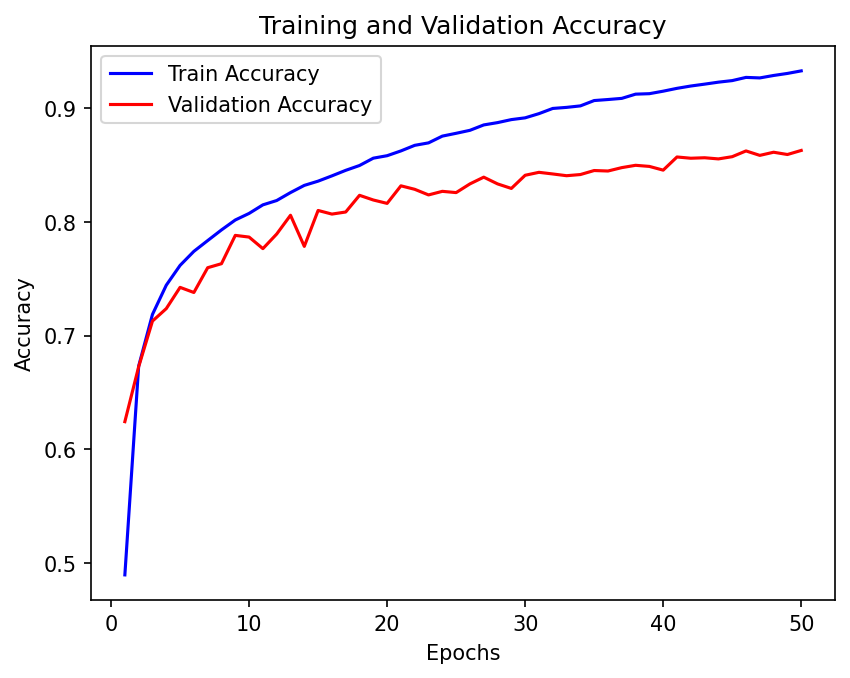

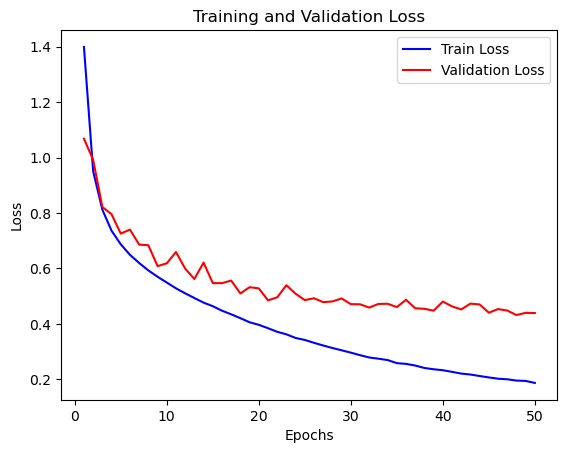

In [ ]:
# Lấy thông tin về độ chính xác từ lịch sử huấn luyện
train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

# Vẽ đồ thị
epochs = range(1, n_epochs+1)
plt.figure(dpi=150)
plt.plot(epochs, train_accuracy, 'b', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Lấy thông tin về độ chính xác từ lịch sử huấn luyện
train_accuracy = history['loss']
val_accuracy = history['val_loss']

# Vẽ đồ thị
epochs = range(1, n_epochs+1)

plt.plot(epochs, train_accuracy, 'b', label='Train Loss')
plt.plot(epochs, val_accuracy, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

model.evaluate_generator(generator=test_generator,
steps=STEP_SIZE_TEST)

C:\Users\nkhan\AppData\Local\Temp\ipykernel_23444\686175149.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=test_generator,


[0.44906049966812134, 0.8617256879806519]

114/114 [==============================] - 4s 31ms/step
Confusion Matrix:
[[1113   31   26   60   30    3    3    5    4]
 [  29  910   13   18   20    1    2    0    0]
 [  18    7  408    1   12    0   13    0    0]
 [  72    6    3  330   11    0    4    1    2]
 [  13    8    9   16  287    6    0    0    0]
 [   2    1    0    0    2   17    0    0    0]
 [   1    1   11    4    2    0   55    0    0]
 [   3    1    0    0    4    1    1   15    0]
 [   4    2    3    6    2    1    0    1    7]]
Classification Report:
neutral:
  Precision: 0.887
  Recall: 0.873
  F1-Score: 0.880
  Support: 1275
happiness:
  Precision: 0.941
  Recall: 0.916
  F1-Score: 0.929
  Support: 993
surprise:
  Precision: 0.863
  Recall: 0.889
  F1-Score: 0.876
  Support: 459
sadness:
  Precision: 0.759
  Recall: 0.769
  F1-Score: 0.764
  Support: 429
anger:
  Precision: 0.776
  Recall: 0.847
  F1-Score: 0.810
  Support: 339
disgust:
  Precision: 0.586
  Recall: 0.773
  F1-Score: 0.667
  Support: 22
fear:
 

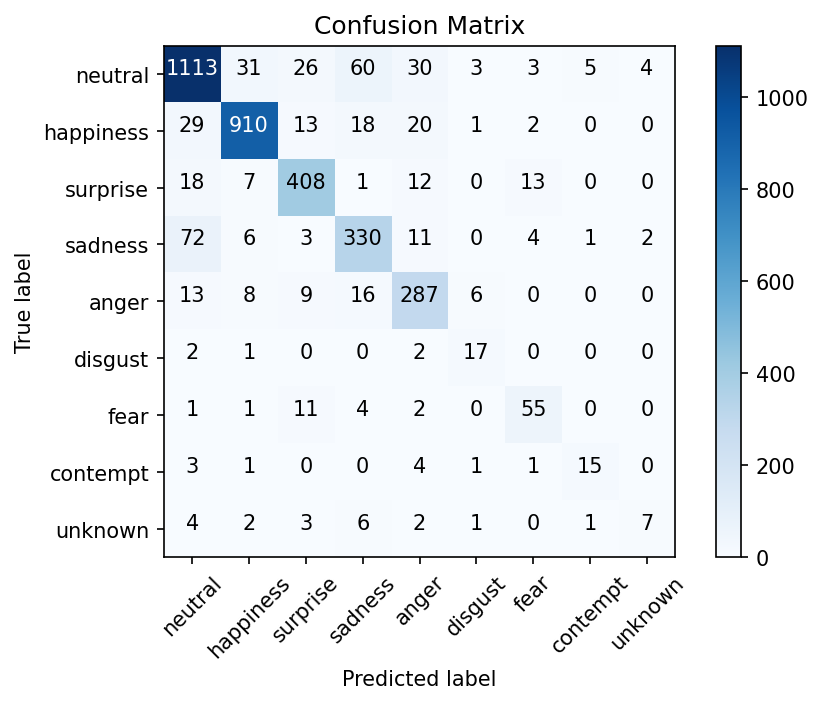

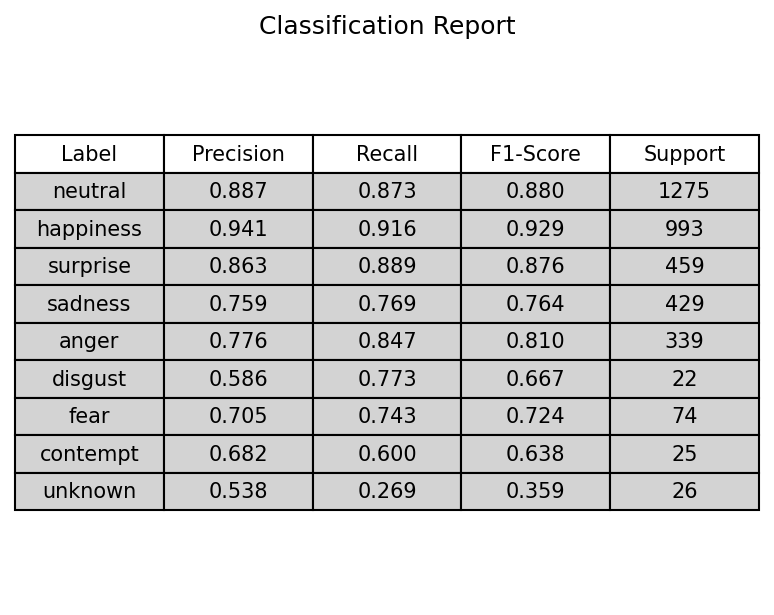

In [ ]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

label = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt', 'unknown']

# Dự đoán trên dữ liệu kiểm tra
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Tính confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Tính classification report (bao gồm precision, recall, và F1-score)
report = classification_report(y_true, y_pred, target_names=label, output_dict=True)
print("Classification Report:")
for key, value in report.items():
    if key in label:
        print(f"{key}:")
        print(f"  Precision: {value['precision']:.3f}")
        print(f"  Recall: {value['recall']:.3f}")
        print(f"  F1-Score: {value['f1-score']:.3f}")
        print(f"  Support: {value['support']}")

# Hiển thị confusion matrix dưới dạng đồ thị
plt.figure(dpi=150)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(label))
plt.xticks(tick_marks, label, rotation=45)
plt.yticks(tick_marks, label)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Hiển thị classification report dưới dạng đồ thị
plt.figure(dpi=150)
plt.axis('off')
table_data = []
for key, value in report.items():
    if key in label:
        table_data.append([key, f"{value['precision']:.3f}", f"{value['recall']:.3f}", f"{value['f1-score']:.3f}", value['support']])

table = plt.table(cellText=table_data, colLabels=['Label', 'Precision', 'Recall', 'F1-Score', 'Support'],
                  cellLoc='center', loc='center', cellColours=[['lightgray']*5]*len(table_data))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.title('Classification Report')

# Hiển thị đồ thị
plt.show()


In [ ]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import os

label = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt', 'unknown']

# Dự đoán trên dữ liệu kiểm tra
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
print("y_true: ",y_true)
# Tính confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Tính classification report (bao gồm precision, recall, và F1-score)
report = classification_report(y_true, y_pred, target_names=label, output_dict=True)
print("Classification Report:")
for key, value in report.items():
    if key in label:
        print(f"{key}:")
        print(f"  Precision: {value['precision']:.3f}")
        print(f"  Recall: {value['recall']:.3f}")
        print(f"  F1-Score: {value['f1-score']:.3f}")
        print(f"  Support: {value['support']}")





# Save the data to the "VGG16" folder
folder_name = "Xception"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

from keras.models import save_model
save_model(model, os.path.join(folder_name,f'{folder_name}.h5'))

np.save(os.path.join(folder_name, "y_pred.npy"), y_pred)
np.save(os.path.join(folder_name, "y_true.npy"), y_true)
np.save(os.path.join(folder_name, "cm.npy"), cm)
np.save(os.path.join(folder_name, "report.npy"), report)
np.save(os.path.join(folder_name, "val_accuracy.npy"), val_accuracy)
np.save(os.path.join(folder_name, "train_accuracy.npy"), train_accuracy)

# Hiển thị confusion matrix dưới dạng đồ thị
plt.figure(dpi=150)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(label))
plt.xticks(tick_marks, label, rotation=45)
plt.yticks(tick_marks, label)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Save the figure for confusion matrix
plt.savefig(os.path.join(folder_name, "confusion_matrix.png"))
plt.close()

# Hiển thị classification report dưới dạng đồ thị
plt.figure(dpi=150)
plt.axis('off')
table_data = []
for key, value in report.items():
    if key in label:
        table_data.append([key, f"{value['precision']:.3f}", f"{value['recall']:.3f}", f"{value['f1-score']:.3f}", value['support']])

table = plt.table(cellText=table_data, colLabels=['Label', 'Precision', 'Recall', 'F1-Score', 'Support'],
                  cellLoc='center', loc='center', cellColours=[['lightgray']*5]*len(table_data))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.title('Classification Report')

# Save the figure for classification report
plt.savefig(os.path.join(folder_name, "classification_report.png"))
plt.close()

# Lấy thông tin về độ chính xác từ lịch sử huấn luyện
train_accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

# Vẽ đồ thị
epochs = range(1, n_epochs+1)
plt.figure(dpi=150)
plt.plot(epochs, train_accuracy, 'b', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Save the figure for accuracy curve
plt.savefig(os.path.join(folder_name, "accuracy_curve.png"))
plt.close()

# Lấy thông tin về độ chính xác từ lịch sử huấn luyện
train_loss = history['loss']
val_loss = history['val_loss']

# Vẽ đồ thị
plt.figure(dpi=150)
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Save the figure for loss curve
plt.savefig(os.path.join(folder_name, "loss_curve.png"))
plt.close()

# Show the plots
plt.show()


114/114 [==============================] - 4s 31ms/step
y_true:  [1, 1, 3, 0, 0, 0, 0, 1, 3, 3, 1, 2, 4, 2, 1, 2, 0, 0, 1, 7, 4, 0, 0, 0, 0, 0, 2, 3, 0, 3, 2, 1, 4, 0, 2, 2, 1, 0, 1, 2, 1, 3, 6, 0, 0, 3, 2, 1, 2, 3, 4, 6, 0, 0, 2, 2, 3, 0, 4, 0, 0, 3, 1, 3, 8, 3, 2, 1, 1, 2, 0, 0, 1, 6, 3, 0, 0, 0, 6, 2, 1, 1, 4, 0, 0, 2, 2, 4, 2, 0, 3, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 3, 2, 0, 3, 1, 0, 1, 4, 3, 3, 4, 0, 4, 1, 3, 3, 1, 2, 4, 1, 2, 4, 0, 2, 0, 2, 2, 1, 0, 2, 1, 4, 0, 0, 3, 0, 0, 1, 1, 1, 4, 4, 0, 1, 1, 3, 3, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 7, 1, 1, 4, 0, 5, 0, 3, 4, 0, 0, 1, 1, 3, 2, 1, 1, 1, 2, 3, 0, 0, 2, 3, 0, 0, 3, 0, 1, 0, 3, 1, 1, 0, 0, 0, 3, 4, 1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 3, 4, 2, 2, 3, 0, 2, 0, 1, 0, 0, 3, 4, 4, 2, 0, 0, 0, 3, 0, 1, 1, 0, 0, 3, 0, 0, 2, 0, 0, 7, 1, 3, 2, 3, 2, 1, 1, 3, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 3, 3, 2, 0, 0, 0, 2, 1, 3, 1, 4, 2, 1, 0, 1, 1, 0, 6, 0, 4, 1, 0, 0, 0, 2, 2, 1, 1, 0, 1, 4, 2, 4, 1, 4, 0, 0, 0, 4, 3, 4, 0, 4, 7, 2, 3, 1, 7, 3, 3, 0

In [ ]:
from keras.models import load_model

# Tải model từ tệp tin đã lưu
model = load_model(os.path.join(folder_name,f'{folder_name}.h5'))
model.evaluate_generator(generator=test_generator,
steps=STEP_SIZE_TEST)
# Dự đoán trên dữ liệu mới
predictions = model.predict(test_generator)

C:\Users\nkhan\AppData\Local\Temp\ipykernel_23444\3272500819.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=test_generator,


114/114 [==============================] - 4s 28ms/step


In [ ]:
from keras.models import load_model
loaded = load_model('.\Xception\Xception.h5')
num_classes = len(test_generator.class_indices)
print("Số lượng lớp trong test_generator:", num_classes)

Số lượng lớp trong test_generator: 9


Predicted images


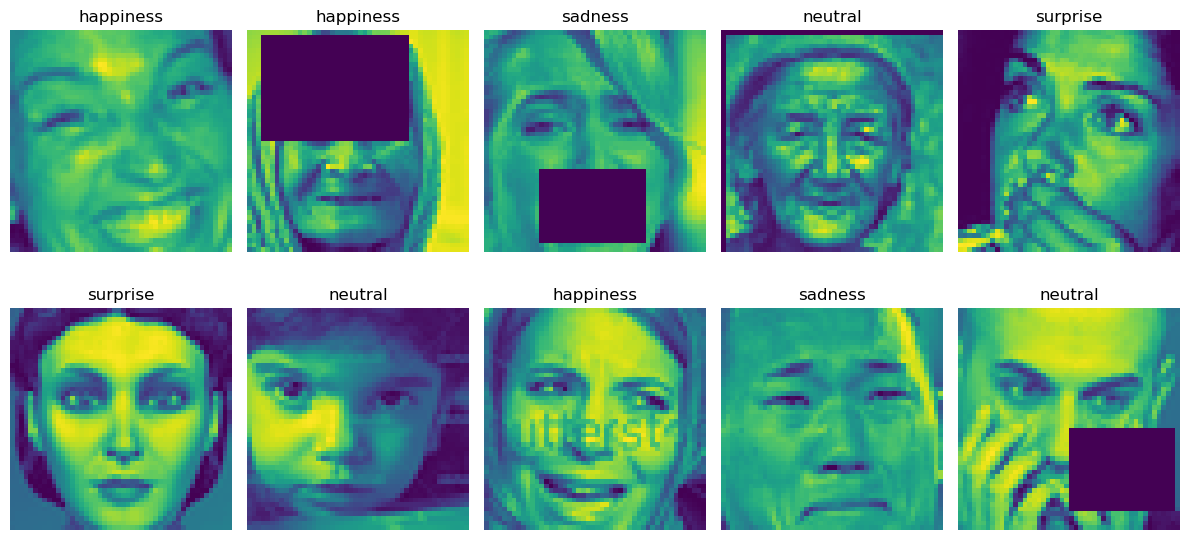

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

label = ['neutral', 'happiness', 'surprise', 'sadness', 'anger', 'disgust', 'fear', 'contempt', 'unknown']

# Lấy 10 hình ảnh từ dữ liệu kiểm tra
sample_images = test_generator.filepaths[:10]
predicted_labels = [label[pred] for pred in y_pred[:10]]

# Hiển thị 10 hình ảnh và kết quả dự đoán tương ứng
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
print("Predicted images")
for i, img_path in enumerate(sample_images):
    # Đọc hình ảnh từ đường dẫn
    img = plt.imread(img_path)

    # Hiển thị hình ảnh
    axes[i].imshow(img)
    axes[i].set_title(predicted_labels[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# # save and quantize model
# model.save('./emotion.h5')
# model = tf.keras.models.load_model('./emotion.h5')
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()
# open("emotion.tflite", "wb").write(tflite_model)

In [ ]:
# model.evaluate(df_final_test_generator)